In [90]:
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import auc
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix,precision_recall_curve,roc_curve
from sklearn.metrics import plot_precision_recall_curve
from imblearn.over_sampling import SMOTE
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer

In [99]:
data = pd.read_csv('aug_train.csv', header=0, index_col=0)
data = data.reset_index()

def change_gender(a): # поменяем пол на 1 и 0
    if (a == 'Male'):
        a = 1
    else:
        a = 0
    return a

def change_dmg(a): # поменяем пол на 1 и 0
    if (a == 'Yes'):
        a = 1
    else:
        a = 0
    return a

# преобразуем качественные признаки в бинарные

data['Gender'] = data['Gender'].map(change_gender)
data['Vehicle_Damage'] = data['Vehicle_Damage'].map(change_dmg)

data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,167647,1,22,1,7.0,1,< 1 Year,0,2630.0,152.0,16,0
1,17163,1,42,1,28.0,0,1-2 Year,1,43327.0,26.0,135,0
2,32023,0,66,1,33.0,0,1-2 Year,1,35841.0,124.0,253,0
3,87447,0,22,1,33.0,0,< 1 Year,0,27645.0,152.0,69,0
4,501933,1,28,1,46.0,1,< 1 Year,0,29023.0,152.0,211,0


In [100]:
# тоже самое для тестовой выборки

data_test = pd.read_csv('aug_test.csv', header=0, index_col=0)
data_test = data_test.reset_index()

data_test['Gender'] = data_test['Gender'].map(change_gender)
data_test['Vehicle_Damage'] = data_test['Vehicle_Damage'].map(change_dmg)

data_test.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,57782,0,34,1,39.0,1,1-2 Year,0,38244.0,124.0,146
1,286811,0,55,1,28.0,0,> 2 Years,1,37577.0,122.0,109
2,117823,1,39,1,28.0,1,1-2 Year,0,24578.0,26.0,63
3,213992,1,28,1,50.0,1,1-2 Year,0,40507.0,8.0,129
4,324756,0,24,1,10.0,0,< 1 Year,1,36783.0,152.0,201


In [101]:
"""Применим One-hot encoding к параметру Vehicle_Age по всему датасету."""

dummies_education = pd.get_dummies(data['Vehicle_Age'], prefix = 'Vehicle_Age')
data = pd.concat([data, dummies_education], axis = 1)
data = data.drop(['Vehicle_Age'], axis=1)

dummies_education = pd.get_dummies(data_test['Vehicle_Age'], prefix = 'Vehicle_Age')
data_test = pd.concat([data_test, dummies_education], axis = 1)
data_test = data_test.drop(['Vehicle_Age'], axis=1)

In [5]:
data.head(10)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years
0,167647,1,22,1,7.0,1,0,2630.0,152.0,16,0,0,1,0
1,17163,1,42,1,28.0,0,1,43327.0,26.0,135,0,1,0,0
2,32023,0,66,1,33.0,0,1,35841.0,124.0,253,0,1,0,0
3,87447,0,22,1,33.0,0,0,27645.0,152.0,69,0,0,1,0
4,501933,1,28,1,46.0,1,0,29023.0,152.0,211,0,0,1,0
5,295775,0,25,1,25.0,1,0,27954.0,152.0,23,0,0,1,0
6,71711,1,51,1,8.0,0,1,2630.0,26.0,209,0,1,0,0
7,331781,1,38,1,28.0,1,0,2630.0,26.0,51,0,1,0,0
8,290704,0,45,1,28.0,0,1,55873.0,124.0,262,0,1,0,0
9,344792,1,42,1,28.0,0,1,27801.0,122.0,217,1,1,0,0


In [6]:
data_test.head(10)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years
0,57782,0,34,1,39.0,1,0,38244.0,124.0,146,1,0,0
1,286811,0,55,1,28.0,0,1,37577.0,122.0,109,0,0,1
2,117823,1,39,1,28.0,1,0,24578.0,26.0,63,1,0,0
3,213992,1,28,1,50.0,1,0,40507.0,8.0,129,1,0,0
4,324756,0,24,1,10.0,0,1,36783.0,152.0,201,0,1,0
5,425764,1,33,1,8.0,1,0,55980.0,152.0,274,0,1,0
6,2934,1,50,1,18.0,0,1,36100.0,26.0,92,1,0,0
7,99098,1,55,1,47.0,0,1,21857.0,26.0,87,1,0,0
8,120076,1,60,1,28.0,1,1,37726.0,122.0,214,1,0,0
9,272687,1,44,1,35.0,1,0,28932.0,26.0,12,1,0,0


In [6]:
data.isna().sum(), data_test.isna().sum()

(id                       0
 Gender                   0
 Age                      0
 Driving_License          0
 Region_Code              0
 Previously_Insured       0
 Vehicle_Damage           0
 Annual_Premium           0
 Policy_Sales_Channel     0
 Vintage                  0
 Response                 0
 Vehicle_Age_1-2 Year     0
 Vehicle_Age_< 1 Year     0
 Vehicle_Age_> 2 Years    0
 dtype: int64,
 id                       0
 Gender                   0
 Age                      0
 Driving_License          0
 Region_Code              0
 Previously_Insured       0
 Vehicle_Damage           0
 Annual_Premium           0
 Policy_Sales_Channel     0
 Vintage                  0
 Vehicle_Age_1-2 Year     0
 Vehicle_Age_< 1 Year     0
 Vehicle_Age_> 2 Years    0
 dtype: int64)

In [7]:
data.nunique(), data_test.nunique()

(id                       382154
 Gender                        2
 Age                          66
 Driving_License               2
 Region_Code                  53
 Previously_Insured            2
 Vehicle_Damage                2
 Annual_Premium            48993
 Policy_Sales_Channel        156
 Vintage                     290
 Response                      2
 Vehicle_Age_1-2 Year          2
 Vehicle_Age_< 1 Year          2
 Vehicle_Age_> 2 Years         2
 dtype: int64,
 id                       78273
 Gender                       2
 Age                         66
 Driving_License              2
 Region_Code                 53
 Previously_Insured           2
 Vehicle_Damage               2
 Annual_Premium           30123
 Policy_Sales_Channel       134
 Vintage                    290
 Vehicle_Age_1-2 Year         2
 Vehicle_Age_< 1 Year         2
 Vehicle_Age_> 2 Years        2
 dtype: int64)

In [8]:
data.describe()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years
count,382154.000000,382154.000000,382154.000000,382154.000000,382154.000000,382154.000000,382154.000000,382154.000000,382154.000000,382154.000000,382154.000000,382154.000000,382154.000000,382154.000000
mean,234392.953477,0.538011,38.545691,0.998108,26.406867,0.489182,0.480573,30711.271362,111.939812,154.189429,0.163811,0.523810,0.435304,0.040887
std,139527.487326,0.498554,15.226897,0.043455,13.181241,0.499884,0.499623,17061.595532,54.286511,83.735107,0.370104,0.499433,0.495797,0.198028
min,1.000000,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000
25%,115006.250000,0.000000,25.000000,1.000000,15.000000,0.000000,0.000000,24546.000000,26.000000,81.000000,0.000000,0.000000,0.000000,0.000000
50%,230461.500000,1.000000,36.000000,1.000000,28.000000,0.000000,0.000000,31692.000000,145.000000,154.000000,0.000000,1.000000,0.000000,0.000000
75%,345434.750000,1.000000,49.000000,1.000000,35.000000,1.000000,1.000000,39447.750000,152.000000,227.000000,0.000000,1.000000,1.000000,0.000000
max,508145.000000,1.000000,85.000000,1.000000,52.000000,1.000000,1.000000,540165.000000,163.000000,299.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
data_test.describe()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years
count,78273.000000,78273.000000,78273.000000,78273.000000,78273.000000,78273.000000,78273.000000,78273.000000,78273.000000,78273.000000,78273.000000,78273.000000,78273.000000
mean,233993.913827,0.537222,38.507570,0.997866,26.381434,0.488917,0.481341,30707.042441,111.993216,154.827220,0.521316,0.436536,0.042147
std,139265.743227,0.498616,15.216589,0.046141,13.149780,0.499880,0.499655,17044.185877,54.270018,83.476632,0.499549,0.495959,0.200927
min,2.000000,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000,0.000000,0.000000
25%,115579.000000,0.000000,25.000000,1.000000,15.000000,0.000000,0.000000,24548.000000,26.000000,83.000000,0.000000,0.000000,0.000000
50%,229110.000000,1.000000,36.000000,1.000000,28.000000,0.000000,0.000000,31741.000000,150.000000,155.000000,1.000000,0.000000,0.000000
75%,344739.000000,1.000000,49.000000,1.000000,35.000000,1.000000,1.000000,39476.000000,152.000000,227.000000,1.000000,1.000000,0.000000
max,508136.000000,1.000000,85.000000,1.000000,52.000000,1.000000,1.000000,489663.000000,163.000000,299.000000,1.000000,1.000000,1.000000


((array([127943.,  45399.,  38621.,  49633.,  47616.,  26036.,  20781.,
          13670.,  10589.,   1866.]),
  array([20. , 26.5, 33. , 39.5, 46. , 52.5, 59. , 65.5, 72. , 78.5, 85. ]),
  <BarContainer object of 10 artists>),
 (array([26313.,  9303.,  7790., 10157.,  9849.,  5286.,  4279.,  2751.,
          2183.,   362.]),
  array([20. , 26.5, 33. , 39.5, 46. , 52.5, 59. , 65.5, 72. , 78.5, 85. ]),
  <BarContainer object of 10 artists>))

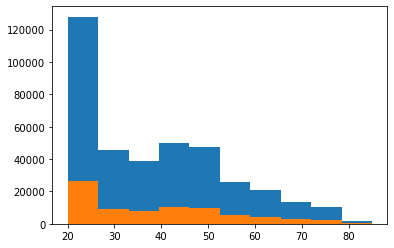

In [11]:
plt.hist(data['Age']), plt.hist(data_test['Age'])

((array([176551.,      0.,      0.,      0.,      0.,      0.,      0.,
              0.,      0., 205603.]),
  array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
  <BarContainer object of 10 artists>),
 (array([36223.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0., 42050.]),
  array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
  <BarContainer object of 10 artists>))

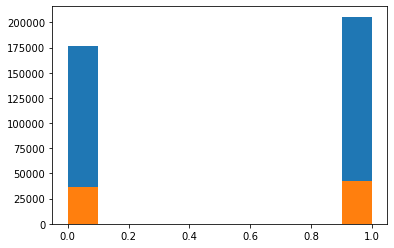

In [12]:
plt.hist(data['Gender']), plt.hist(data_test['Gender'])

(array([319553.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,  62601.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

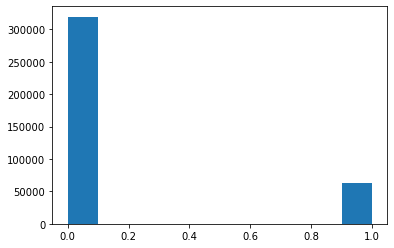

In [13]:
plt.hist(data['Response']) # посмотрим на сбалансированность классов

(None, None)

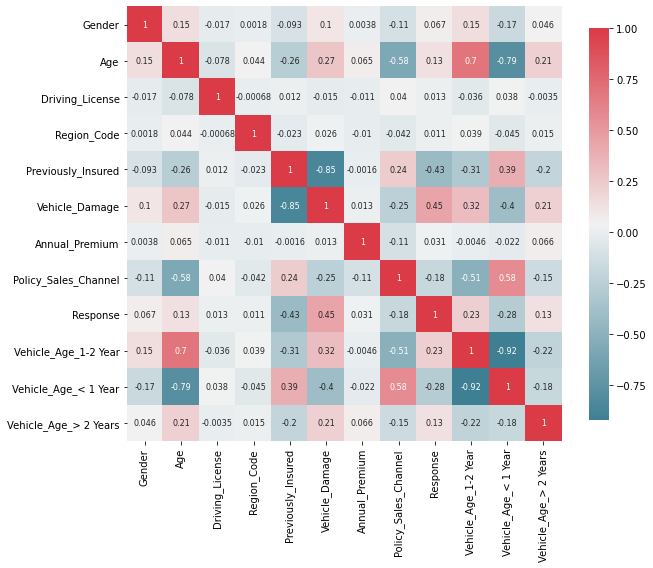

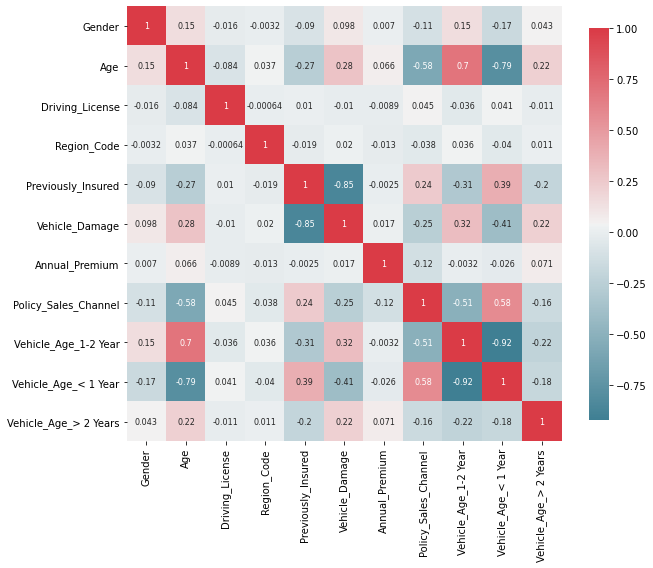

In [6]:
# построим график корреляции

corr_data = data.drop(['id', 'Vintage'], axis=1)
corr_test_data = data_test.drop(['id', 'Vintage'], axis=1)

def plot_correlation_map(data):
    corr = data.corr()
    _,ax = plt.subplots(figsize=(10, 8))
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    _=sns.heatmap(corr,
                  cmap = cmap,
                  square=True,
                  cbar_kws={'shrink':.9},
                  annot = True,
                  annot_kws = {'fontsize':8})

plot_correlation_map(corr_data), plot_correlation_map(corr_test_data)

In [102]:
"""Поместим целевой признак в отдельную переменную и разделим датасет на train и test."""

y = data['Response']
X = data.drop(['Response'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 69)

In [8]:
"""Посмотрим на важность призников."""

def plot_model_var_imp(model, X, y):
    imp = pd.DataFrame(model.feature_importances_,
                       columns = ['Importance'],
                       index = X.columns)
    imp = imp.sort_values(['Importance'], ascending=True)
    imp[:10].plot(kind='barh')
    print(model.score(X, y))

def plot_variable_importance(X, y):
    tree = DecisionTreeClassifier(random_state=69)
    tree.fit(X, y)
    plot_model_var_imp(tree, X, y)

1.0


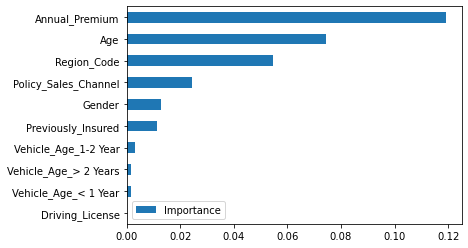

In [17]:
plot_variable_importance(X_train, y_train)

In [9]:
"""Для начала попробуем применить стандартные модели, подходящие для задачи бинарной классификации.
Кросс-валидация и случайный лес."""

model_RF = RandomForestClassifier(n_estimators=25)

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     64072
           1       0.80      0.45      0.58     12359

    accuracy                           0.89     76431
   macro avg       0.85      0.71      0.76     76431
weighted avg       0.89      0.89      0.88     76431



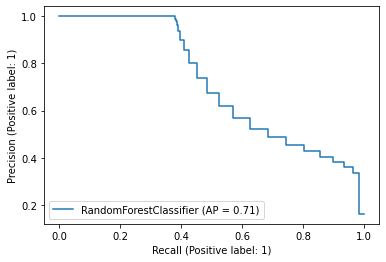

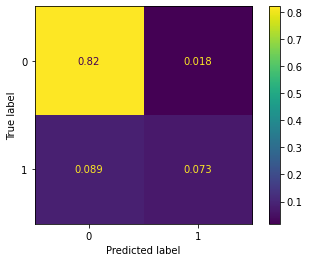

In [10]:
model_RF.fit(X_train, y_train)
pred = model_RF.predict(X_test)

plot_precision_recall_curve(model_RF, X_test, y_test)

cm = confusion_matrix(y_test, pred, normalize='all')
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     64072
           1       1.00      0.38      0.55     12359

    accuracy                           0.90     76431
   macro avg       0.95      0.69      0.75     76431
weighted avg       0.91      0.90      0.88     76431



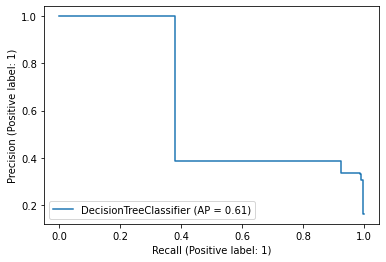

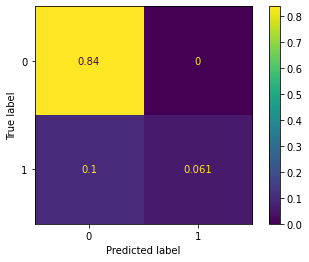

In [11]:
"""Попробуем Решающее дерево."""

tree_model = DecisionTreeClassifier(max_depth=3, random_state=69)
tree_model.fit(X_train, y_train)

pred = tree_model.predict(X_test)
plot_precision_recall_curve(tree_model, X_test, y_test)

cm = confusion_matrix(y_test, pred, normalize='all')
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92     64072
           1       0.64      0.16      0.26     12359

    accuracy                           0.85     76431
   macro avg       0.75      0.57      0.59     76431
weighted avg       0.82      0.85      0.81     76431



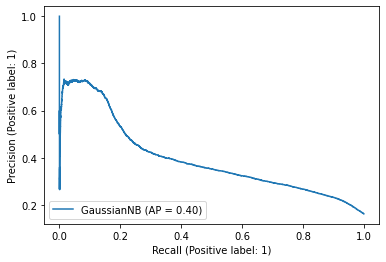

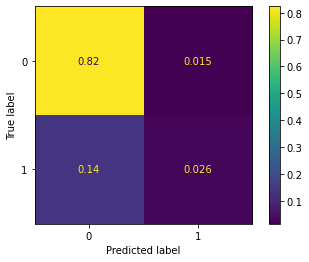

In [12]:
"""Попробуем Наивный Байес."""

gauss_model = GaussianNB()
gauss_model.fit(X_train, y_train)

pred = gauss_model.predict(X_test)
plot_precision_recall_curve(gauss_model, X_test, y_test)

cm = confusion_matrix(y_test, pred, normalize='all')
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91     64072
           1       0.49      0.03      0.05     12359

    accuracy                           0.84     76431
   macro avg       0.66      0.51      0.48     76431
weighted avg       0.78      0.84      0.77     76431



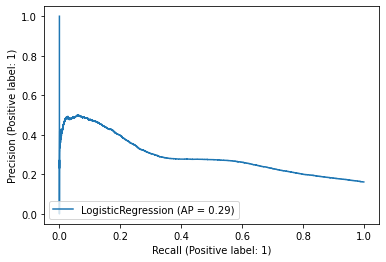

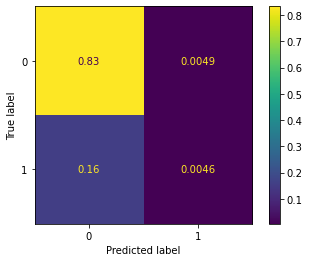

In [13]:
"""Пробуем логистическую регрессию."""

reg_model = LogisticRegression(solver='liblinear')
reg_model.fit(X_train, y_train)
pred = reg_model.predict(X_test)

plot_precision_recall_curve(reg_model, X_test, y_test)

cm = confusion_matrix(y_test, pred, normalize='all')
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

print(classification_report(y_test, reg_model.predict(X_test)))

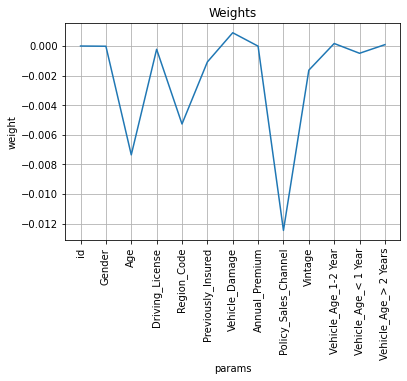

In [14]:
coefs = reg_model.coef_
cols = list(X_train.columns.values)

coefs = coefs.ravel().tolist()

fig, ax = plt.subplots()
ax.plot(cols, coefs)

ax.set(xlabel='params', ylabel='weight', title='Weights')
ax.grid()
plt.xticks(rotation=90)
plt.rcParams["figure.figsize"] = (12,8)

plt.show()

In [15]:
"""Далее попробуем сбалансировать наши данные разными способами, чтобы улучшить точность
использованных моделей."""

def build_cm(y_test, pred):
    cm = confusion_matrix(y_test, pred, normalize='all')
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()

def build_auc(y_test, X_test, model):
    plot_precision_recall_curve(model, X_test, y_test)

In [103]:
data_2 = data.drop(['id', 'Vintage'], axis=1)

In [104]:
data_poly = data_2[['Age', 'Policy_Sales_Channel', 'Region_Code', 'Annual_Premium']]
data_poly

,Age,Policy_Sales_Channel,Region_Code,Annual_Premium
0,22,152.0,7.0,2630.0
1,42,26.0,28.0,43327.0
2,66,124.0,33.0,35841.0
3,22,152.0,33.0,27645.0
4,28,152.0,46.0,29023.0
...,...,...,...,...
382149,24,152.0,15.0,23938.0
382150,27,152.0,28.0,336395.0
382151,45,26.0,28.0,40443.0
382152,28,152.0,28.0,25380.0


In [105]:
p = PolynomialFeatures(degree=2).fit(data_poly)
features = pd.DataFrame(p.transform(data_poly), 
                        columns=p.get_feature_names(data_poly.columns))

In [106]:
features = features[['Age^2', 'Age Policy_Sales_Channel', 'Age Region_Code', 'Age Annual_Premium', 'Policy_Sales_Channel^2',
                     'Policy_Sales_Channel Region_Code', 'Policy_Sales_Channel Annual_Premium', 'Region_Code^2', 'Region_Code Annual_Premium',
                    'Annual_Premium^2']]
data_2 = pd.concat([data_2, features], axis=1)

In [91]:
features

,Age^2,Age Policy_Sales_Channel,Age Region_Code,Age Annual_Premium,Policy_Sales_Channel^2,Policy_Sales_Channel Region_Code,Policy_Sales_Channel Annual_Premium,Region_Code^2,Region_Code Annual_Premium,Annual_Premium^2
0,484.0,3344.0,154.0,57860.0,23104.0,1064.0,399760.0,49.0,18410.0,6.916900e+06
1,1764.0,1092.0,1176.0,1819734.0,676.0,728.0,1126502.0,784.0,1213156.0,1.877229e+09
2,4356.0,8184.0,2178.0,2365506.0,15376.0,4092.0,4444284.0,1089.0,1182753.0,1.284577e+09
3,484.0,3344.0,726.0,608190.0,23104.0,5016.0,4202040.0,1089.0,912285.0,7.642460e+08
4,784.0,4256.0,1288.0,812644.0,23104.0,6992.0,4411496.0,2116.0,1335058.0,8.423345e+08
...,...,...,...,...,...,...,...,...,...,...
382149,576.0,3648.0,360.0,574512.0,23104.0,2280.0,3638576.0,225.0,359070.0,5.730278e+08
382150,729.0,4104.0,756.0,9082665.0,23104.0,4256.0,51132040.0,784.0,9419060.0,1.131616e+11
382151,2025.0,1170.0,1260.0,1819935.0,676.0,728.0,1051518.0,784.0,1132404.0,1.635636e+09
382152,784.0,4256.0,784.0,710640.0,23104.0,4256.0,3857760.0,784.0,710640.0,6.441444e+08


In [107]:
data_2['Annual_Premium^2'] = data_2['Annual_Premium^2']/1000000
data_2

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Response,Vehicle_Age_1-2 Year,...,Age^2,Age Policy_Sales_Channel,Age Region_Code,Age Annual_Premium,Policy_Sales_Channel^2,Policy_Sales_Channel Region_Code,Policy_Sales_Channel Annual_Premium,Region_Code^2,Region_Code Annual_Premium,Annual_Premium^2
0,1,22,1,7.0,1,0,2630.0,152.0,0,0,...,484.0,3344.0,154.0,57860.0,23104.0,1064.0,399760.0,49.0,18410.0,6.916900
1,1,42,1,28.0,0,1,43327.0,26.0,0,1,...,1764.0,1092.0,1176.0,1819734.0,676.0,728.0,1126502.0,784.0,1213156.0,1877.228929
2,0,66,1,33.0,0,1,35841.0,124.0,0,1,...,4356.0,8184.0,2178.0,2365506.0,15376.0,4092.0,4444284.0,1089.0,1182753.0,1284.577281
3,0,22,1,33.0,0,0,27645.0,152.0,0,0,...,484.0,3344.0,726.0,608190.0,23104.0,5016.0,4202040.0,1089.0,912285.0,764.246025
4,1,28,1,46.0,1,0,29023.0,152.0,0,0,...,784.0,4256.0,1288.0,812644.0,23104.0,6992.0,4411496.0,2116.0,1335058.0,842.334529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382149,1,24,1,15.0,0,1,23938.0,152.0,0,0,...,576.0,3648.0,360.0,574512.0,23104.0,2280.0,3638576.0,225.0,359070.0,573.027844
382150,1,27,1,28.0,1,0,336395.0,152.0,0,0,...,729.0,4104.0,756.0,9082665.0,23104.0,4256.0,51132040.0,784.0,9419060.0,113161.596025
382151,1,45,1,28.0,0,1,40443.0,26.0,0,1,...,2025.0,1170.0,1260.0,1819935.0,676.0,728.0,1051518.0,784.0,1132404.0,1635.636249
382152,0,28,1,28.0,1,0,25380.0,152.0,0,0,...,784.0,4256.0,784.0,710640.0,23104.0,4256.0,3857760.0,784.0,710640.0,644.144400


In [108]:
"""Перекодируем регионы с помощью one-hot encoding."""

data_test_2 = data_test.drop(['id', 'Vintage'], axis=1)

dummies_education = pd.get_dummies(data_2['Region_Code'], prefix = 'Region_Code')
data_2 = pd.concat([data_2, dummies_education], axis = 1)
data_2 = data_2.drop(['Region_Code'], axis=1)

dummies_education = pd.get_dummies(data_test_2['Region_Code'], prefix = 'Region_Code')
data_test_2 = pd.concat([data_test_2, dummies_education], axis = 1)
data_test_2 = data_test_2.drop(['Region_Code'], axis=1)

In [20]:
data_2.head()

,Gender,Age,Driving_License,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Response,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,...,Region_Code_43.0,Region_Code_44.0,Region_Code_45.0,Region_Code_46.0,Region_Code_47.0,Region_Code_48.0,Region_Code_49.0,Region_Code_50.0,Region_Code_51.0,Region_Code_52.0
0,1,22,1,1,0,2630.0,152.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,42,1,0,1,43327.0,26.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,66,1,0,1,35841.0,124.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,22,1,0,0,27645.0,152.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,28,1,1,0,29023.0,152.0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [109]:
"""values[18:35] values[35:91] values[91:153] [1835.0, 3591.0, 91153.0] - группировка по значениям"""

keys = data_2['Policy_Sales_Channel'].value_counts().index.tolist()
values = data_2['Policy_Sales_Channel'].value_counts().tolist()

In [110]:
data_2['Policy_Sales_Channel'] = data_2['Policy_Sales_Channel'].apply(lambda x: 1835.0 if x in keys[18:35] else x)
data_2['Policy_Sales_Channel'] = data_2['Policy_Sales_Channel'].apply(lambda x: 3591.0 if x in keys[35:91] else x)
data_2['Policy_Sales_Channel'] = data_2['Policy_Sales_Channel'].apply(lambda x: 91153.0 if x in keys[91:156] else x)

In [111]:
keys = data_test_2['Policy_Sales_Channel'].value_counts().index.tolist()
values = data_test_2['Policy_Sales_Channel'].value_counts().tolist()

In [112]:
data_test_2['Policy_Sales_Channel'] = data_test_2['Policy_Sales_Channel'].apply(lambda x: 1835.0 if x in keys[18:35] else x)
data_test_2['Policy_Sales_Channel'] = data_test_2['Policy_Sales_Channel'].apply(lambda x: 3591.0 if x in keys[35:91] else x)
data_test_2['Policy_Sales_Channel'] = data_test_2['Policy_Sales_Channel'].apply(lambda x: 91153.0 if x in keys[91:156] else x)

In [113]:
dummies_education = pd.get_dummies(data_2['Policy_Sales_Channel'], prefix = 'Policy_Sales_Channel')
data_2 = pd.concat([data_2, dummies_education], axis = 1)
data_2 = data_2.drop(['Policy_Sales_Channel'], axis=1)

dummies_education = pd.get_dummies(data_test_2['Policy_Sales_Channel'], prefix = 'Policy_Sales_Channel')
data_test_2 = pd.concat([data_test_2, dummies_education], axis = 1)
data_test_2 = data_test_2.drop(['Policy_Sales_Channel'], axis=1)

In [26]:
data_2.head()

,Gender,Age,Driving_License,Previously_Insured,Vehicle_Damage,Annual_Premium,Response,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,...,Policy_Sales_Channel_152.0,Policy_Sales_Channel_154.0,Policy_Sales_Channel_155.0,Policy_Sales_Channel_156.0,Policy_Sales_Channel_157.0,Policy_Sales_Channel_160.0,Policy_Sales_Channel_163.0,Policy_Sales_Channel_1835.0,Policy_Sales_Channel_3591.0,Policy_Sales_Channel_91153.0
0,1,22,1,1,0,2630.0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
1,1,42,1,0,1,43327.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,66,1,0,1,35841.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,22,1,0,0,27645.0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
4,1,28,1,1,0,29023.0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0


In [122]:
y = data_2['Response']
X = data_2.drop(['Response'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 69)

In [28]:
"""Попробуем преобразования с помощью SMOTE."""

sm = SMOTE(sampling_strategy=1, random_state=69, k_neighbors=50)
X_train_res, y_train_res = sm.fit_resample(X, y)

(array([319553.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0., 319553.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

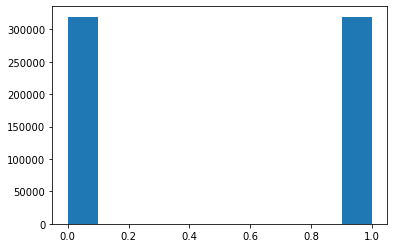

In [29]:
plt.rcParams["figure.figsize"] = (6,4)
plt.hist(y_train_res)

In [123]:
# случайный лес

model_RF = RandomForestClassifier(n_estimators=25)
model_RF.fit(X_train_res, y_train_res)
pred = model_RF.predict(X_test)

(None, None)

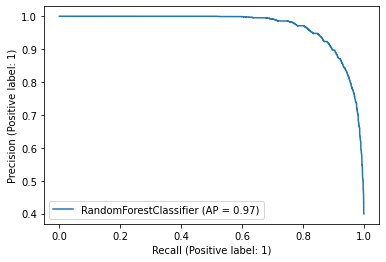

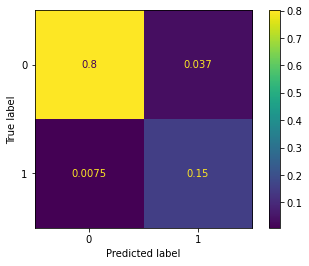

In [125]:
plt.rcParams["figure.figsize"] = (6,4)
build_auc(y_test, X_test, model_RF), build_cm(y_test, pred)

              precision    recall  f1-score   support

           0       0.98      0.70      0.82     64072
           1       0.37      0.94      0.54     12359

    accuracy                           0.74     76431
   macro avg       0.68      0.82      0.68     76431
weighted avg       0.89      0.74      0.77     76431



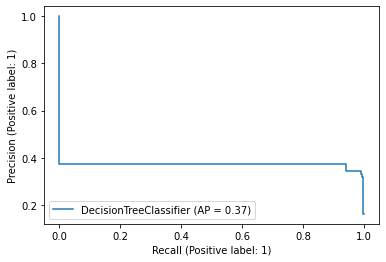

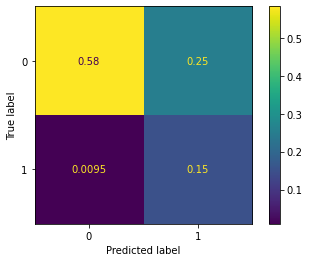

In [32]:
# решающее дерево

tree_model = DecisionTreeClassifier(max_depth=3, random_state=69)
tree_model.fit(X_train_res, y_train_res)

pred = tree_model.predict(X_test)
plot_precision_recall_curve(tree_model, X_test, y_test)

cm = confusion_matrix(y_test, pred, normalize='all')
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

print(classification_report(y_test, pred, zero_division=True))

              precision    recall  f1-score   support

           0       0.90      0.68      0.78     64072
           1       0.27      0.63      0.38     12359

    accuracy                           0.67     76431
   macro avg       0.59      0.65      0.58     76431
weighted avg       0.80      0.67      0.71     76431



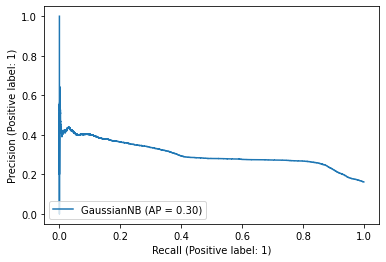

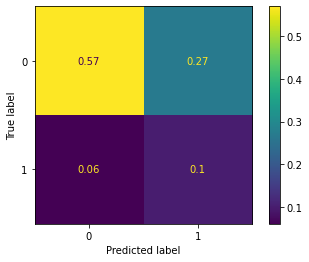

In [33]:
# Байес

gauss_model = GaussianNB()
gauss_model.fit(X_train_res, y_train_res)

pred = gauss_model.predict(X_test)
plot_precision_recall_curve(gauss_model, X_test, y_test)

cm = confusion_matrix(y_test, pred, normalize='all')
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

print(classification_report(y_test, pred))

In [114]:
scaler = Normalizer()
data_norm = data_2
data_norm[['Age', 'Annual_Premium', 'Age^2', 'Age Policy_Sales_Channel', 'Age Region_Code', 'Age Annual_Premium', 'Policy_Sales_Channel^2',
           'Policy_Sales_Channel Region_Code', 'Policy_Sales_Channel Annual_Premium', 'Region_Code^2', 'Region_Code Annual_Premium',
           'Annual_Premium^2']] = scaler.transform(data_norm[['Age', 'Annual_Premium', 'Age^2', 'Age Policy_Sales_Channel', 'Age Region_Code', 'Age Annual_Premium', 'Policy_Sales_Channel^2',
                                                               'Policy_Sales_Channel Region_Code', 'Policy_Sales_Channel Annual_Premium', 'Region_Code^2', 'Region_Code Annual_Premium',
                                                               'Annual_Premium^2']])
data_norm

,Gender,Age,Driving_License,Previously_Insured,Vehicle_Damage,Annual_Premium,Response,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,...,Policy_Sales_Channel_152.0,Policy_Sales_Channel_154.0,Policy_Sales_Channel_155.0,Policy_Sales_Channel_156.0,Policy_Sales_Channel_157.0,Policy_Sales_Channel_160.0,Policy_Sales_Channel_163.0,Policy_Sales_Channel_1835.0,Policy_Sales_Channel_3591.0,Policy_Sales_Channel_91153.0
0,1,5.431717e-05,1,1,0,0.006493,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
1,1,1.706968e-05,1,0,1,0.017609,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1.276144e-05,1,0,1,0.006930,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,5.065759e-06,1,0,0,0.006366,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
4,1,5.982480e-06,1,1,0,0.006201,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382149,1,6.484271e-06,1,0,1,0.006468,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
382150,1,5.115485e-07,1,1,0,0.006373,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
382151,1,1.884539e-05,1,0,1,0.016937,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
382152,0,7.023403e-06,1,1,0,0.006366,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0


In [115]:
y = data_norm['Response']
X = data_norm.drop(['Response'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 69)

sm = SMOTE(sampling_strategy=1, random_state=69, k_neighbors=50)
X_train_res, y_train_res = sm.fit_resample(X, y)

              precision    recall  f1-score   support

           0       0.98      0.75      0.85     64072
           1       0.41      0.92      0.57     12359

    accuracy                           0.77     76431
   macro avg       0.69      0.83      0.71     76431
weighted avg       0.89      0.77      0.80     76431



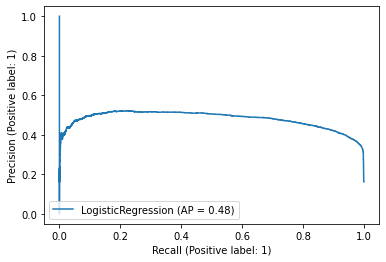

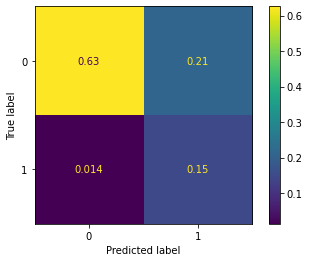

In [133]:
# логистическая регрессия со SMOTE

reg_model = LogisticRegression(penalty='l1', solver = 'liblinear', class_weight='balanced', random_state=69)
reg_model.fit(X_train_res, y_train_res)
pred = reg_model.predict(X_test)
plt.rcParams["figure.figsize"] = (6,4)
plot_precision_recall_curve(reg_model, X_test, y_test)

cm = confusion_matrix(y_test, pred, normalize='all')
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

print(classification_report(y_test, reg_model.predict(X_test), zero_division=True))

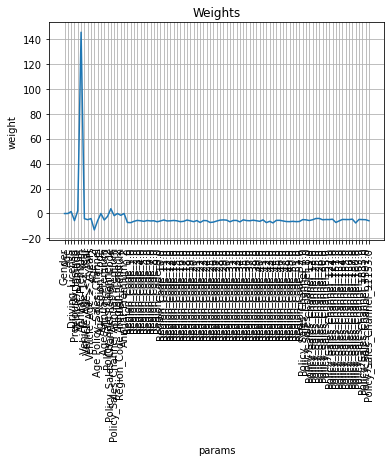

In [134]:
# построим график весов

coefs = reg_model.coef_
cols = list(X_train.columns.values)

coefs = coefs.ravel().tolist()

fig, ax = plt.subplots()
ax.plot(cols, coefs)

ax.set(xlabel='params', ylabel='weight', title='Weights')
ax.grid()
plt.xticks(rotation=90)
plt.rcParams["figure.figsize"] = (12,8)

plt.show()

              precision    recall  f1-score   support

           0       0.98      0.73      0.84     64072
           1       0.40      0.94      0.56     12359

    accuracy                           0.76     76431
   macro avg       0.69      0.83      0.70     76431
weighted avg       0.89      0.76      0.79     76431



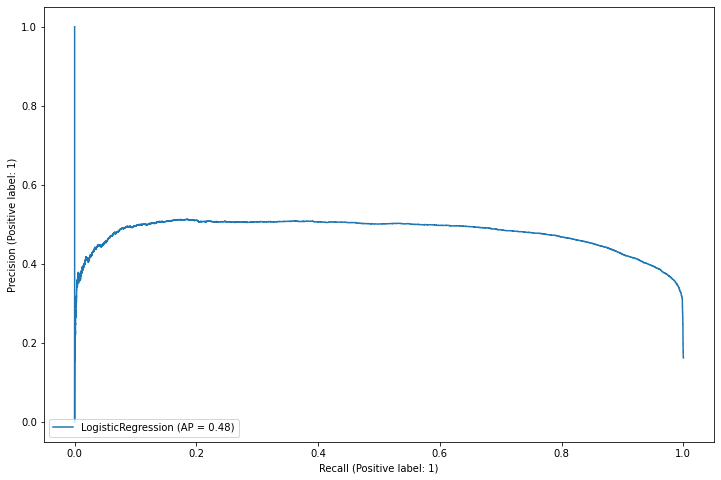

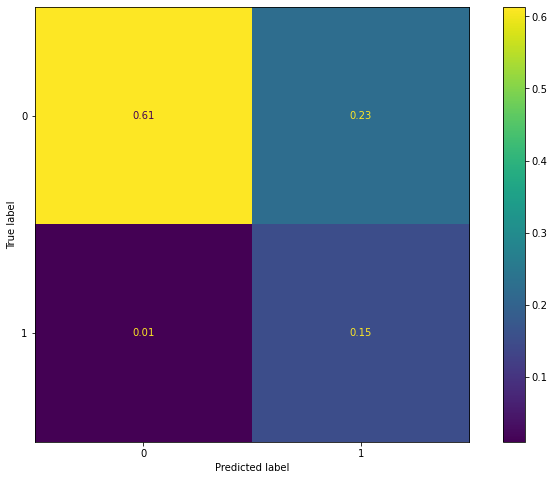

In [129]:
# логистическая регрессия без SMOTE

reg_model = LogisticRegression(penalty='l1', fit_intercept=True, intercept_scaling=2, solver = 'liblinear', class_weight='balanced', random_state=69)
reg_model.fit(X_train, y_train)
pred = reg_model.predict(X_test)

plot_precision_recall_curve(reg_model, X_test, y_test)

cm = confusion_matrix(y_test, pred, normalize='all')
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

print(classification_report(y_test, reg_model.predict(X_test), zero_division=True))

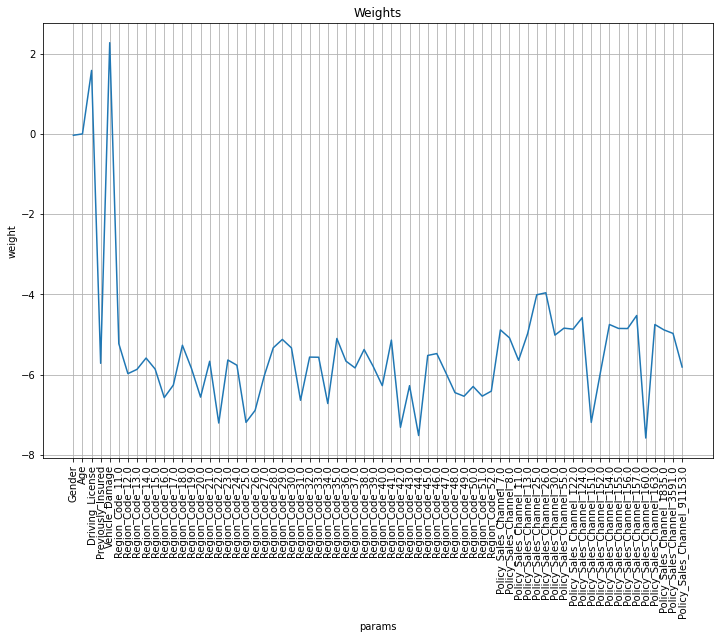

In [152]:
coefs = reg_model.coef_
cols = list(X_train_res.columns.values)

coefs = coefs.ravel().tolist()

fig, ax = plt.subplots()
ax.plot(cols[:5]+cols[30:], coefs[:5]+coefs[30:])

ax.set(xlabel='params', ylabel='weight', title='Weights')
ax.grid()
plt.xticks(rotation=90)
plt.rcParams["figure.figsize"] = (12,8)

plt.show()

In [45]:
# случайный лес

model_RF = RandomForestClassifier(n_estimators=25, max_depth=5, criterion='gini', max_features=0.8, min_samples_split=5, n_jobs= -1, random_state=69)

              precision    recall  f1-score   support

           0       0.84      1.00      0.91     64072
           1       1.00      0.00      0.00     12359

    accuracy                           0.84     76431
   macro avg       0.92      0.50      0.46     76431
weighted avg       0.86      0.84      0.76     76431



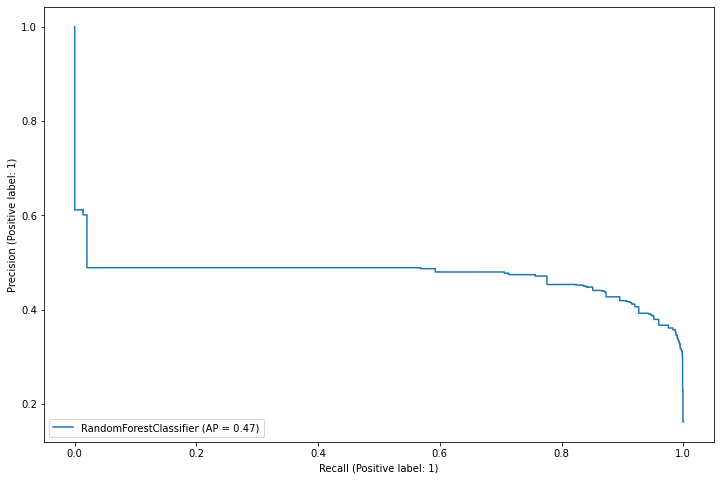

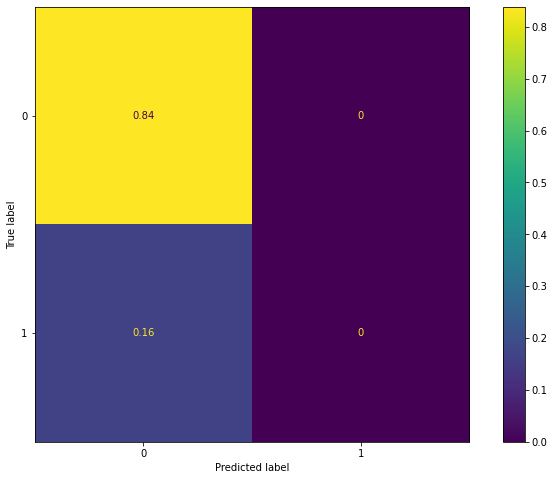

In [46]:
model_RF.fit(X_train, y_train)
pred = model_RF.predict(X_test)

plot_precision_recall_curve(model_RF, X_test, y_test)

cm = confusion_matrix(y_test, pred, normalize='all')
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

print(classification_report(y_test, pred, zero_division=True))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91     64072
           1       1.00      0.00      0.00     12359

    accuracy                           0.84     76431
   macro avg       0.92      0.50      0.46     76431
weighted avg       0.86      0.84      0.76     76431



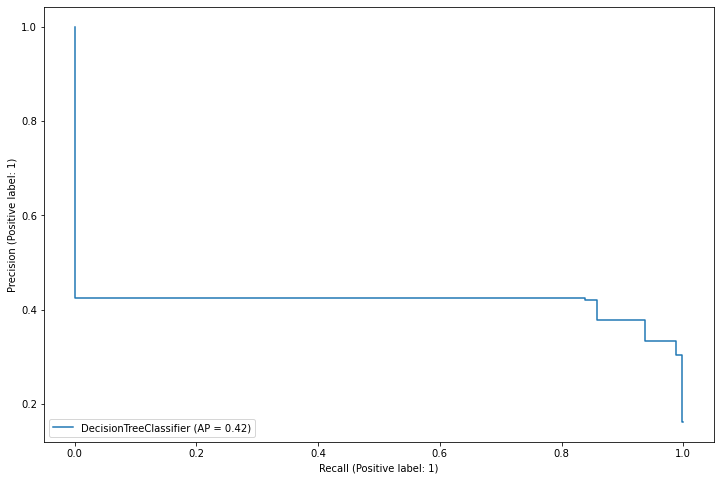

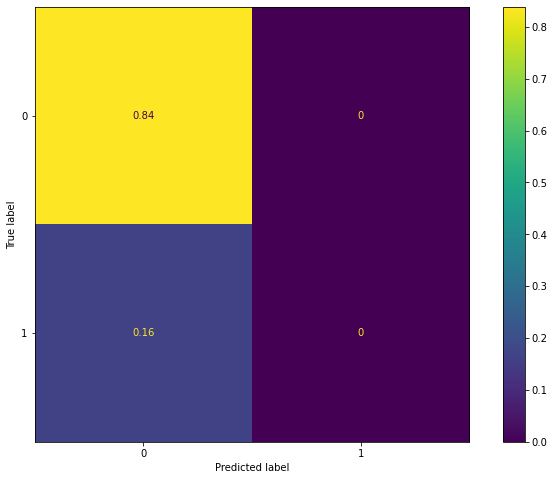

In [47]:
# решающее дерево

tree_model = DecisionTreeClassifier(max_depth=3, random_state=69)
tree_model.fit(X_train, y_train)

pred = tree_model.predict(X_test)
plot_precision_recall_curve(tree_model, X_test, y_test)

cm = confusion_matrix(y_test, pred, normalize='all')
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

print(classification_report(y_test, pred, zero_division=True))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87     64072
           1       0.32      0.33      0.33     12359

    accuracy                           0.78     76431
   macro avg       0.60      0.60      0.60     76431
weighted avg       0.78      0.78      0.78     76431



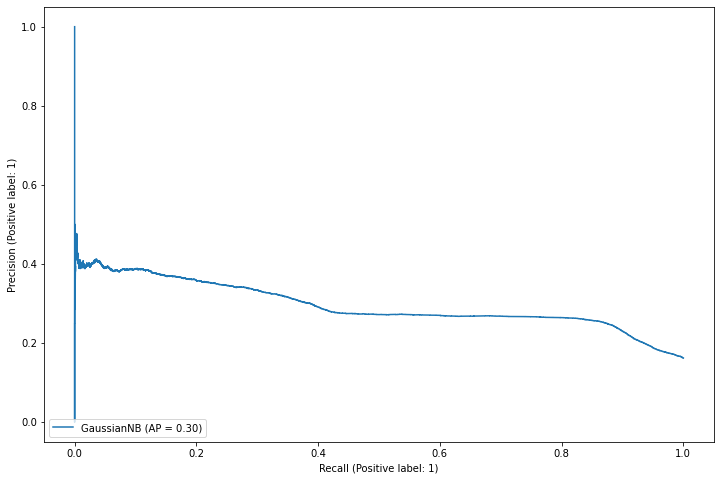

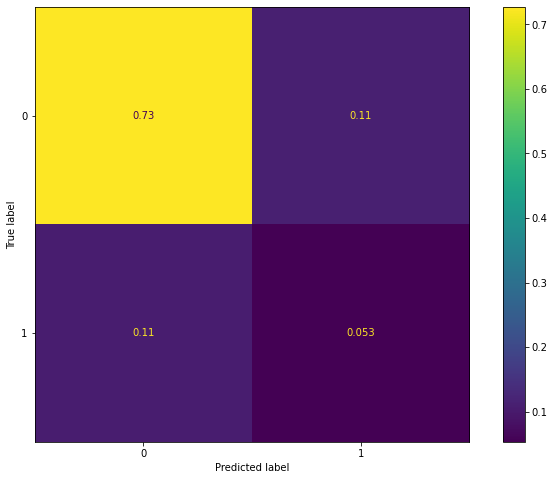

In [43]:
# Байес

gauss_model = GaussianNB()
gauss_model.fit(X_train, y_train)

pred = gauss_model.predict(X_test)
plot_precision_recall_curve(gauss_model, X_test, y_test)

cm = confusion_matrix(y_test, pred, normalize='all')
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.98      0.75      0.85     64072
           1       0.42      0.93      0.57     12359

    accuracy                           0.78     76431
   macro avg       0.70      0.84      0.71     76431
weighted avg       0.89      0.78      0.81     76431



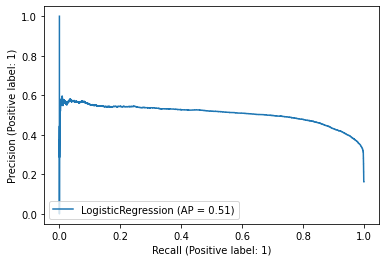

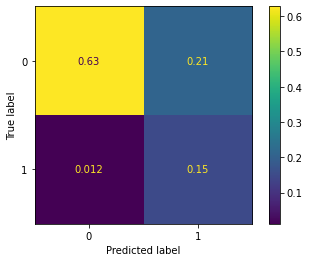

In [112]:
# логистическая регрессия

reg_model = LogisticRegression(penalty='l1', solver = 'liblinear', class_weight='balanced', random_state=69)
reg_model.fit(X_train, y_train)
pred = reg_model.predict(X_test)

plot_precision_recall_curve(reg_model, X_test, y_test)

cm = confusion_matrix(y_test, pred, normalize='all')
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

print(classification_report(y_test, reg_model.predict(X_test), zero_division=True))

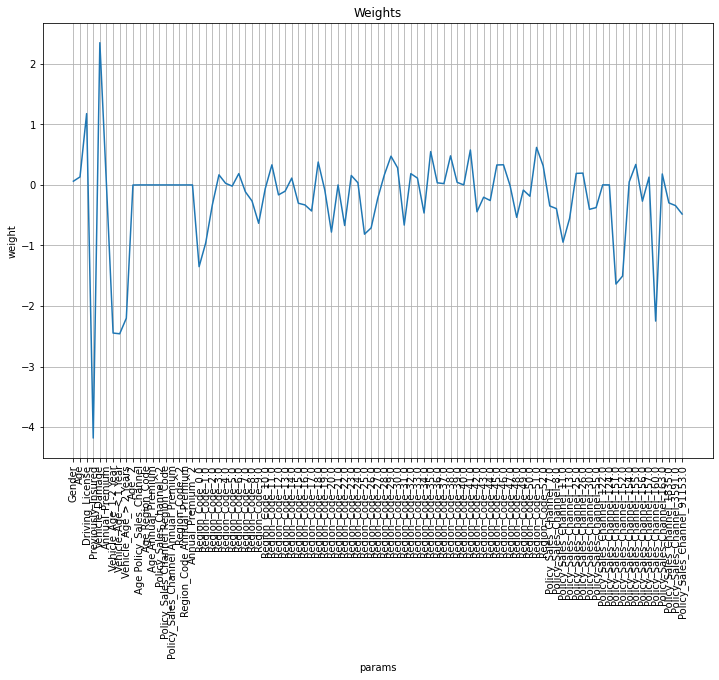

In [122]:
fig, ax = plt.subplots()
ax.plot(dict(zip(X_train.columns, reg_model.coef_[0])).keys(), dict(zip(X_train.columns, reg_model.coef_[0])).values())

ax.set(xlabel='params', ylabel='weight', title='Weights')
ax.grid()
plt.xticks(rotation=90)
plt.rcParams["figure.figsize"] = (12,8)

plt.show()